# Training Deep Neural Networks

# Setup

In [1]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.special import erfc
from functools import partial
import warnings
import os

In [2]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("ggplot")
warnings.filterwarnings(action="ignore")
os.chdir('output')

# The Vanishing/Exploding Gradients Problems

## Initialization

In [3]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

In [4]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [5]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

## Activation Functions

### Leaky RelU

In [6]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [7]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

Let's train a neural network on Fashion MNIST using the Leaky ReLU:

In [8]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 2s 1ms/step - loss: 1.2283 - accuracy: 0.6359 - val_loss: 0.8464 - val_accuracy: 0.7406
Epoch 2/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7726 - accuracy: 0.7505 - val_loss: 0.6918 - val_accuracy: 0.7806
Epoch 3/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6672 - accuracy: 0.7817 - val_loss: 0.6201 - val_accuracy: 0.7994
Epoch 4/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6119 - accuracy: 0.7988 - val_loss: 0.5769 - val_accuracy: 0.8096
Epoch 5/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5757 - accuracy: 0.8098 - val_loss: 0.5501 - val_accuracy: 0.8208


In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 808us/step - loss: 0.5832 - accuracy: 0.7999


[0.5832244157791138, 0.7998999953269958]

### PReLU

Now let's try PReLU:

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/6
1719/1719 [==============================] - 2s 1ms/step - loss: 1.3578 - accuracy: 0.6009 - val_loss: 0.9110 - val_accuracy: 0.7306
Epoch 2/6
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8063 - accuracy: 0.7503 - val_loss: 0.7161 - val_accuracy: 0.7756
Epoch 3/6
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6854 - accuracy: 0.7794 - val_loss: 0.6385 - val_accuracy: 0.7948
Epoch 4/6
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6259 - accuracy: 0.7965 - val_loss: 0.5922 - val_accuracy: 0.8062
Epoch 5/6
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5875 - accuracy: 0.8063 - val_loss: 0.5635 - val_accuracy: 0.8118
Epoch 6/6
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5601 - accuracy: 0.8130 - val_loss: 0.5394 - val_accuracy: 0.8218


In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 879us/step - loss: 0.5685 - accuracy: 0.8063


[0.5684733390808105, 0.8062999844551086]

### ELU

Implementing ELU in TensorFlow is trivial, just specify the activation function when building each layer:

In [18]:
keras.layers.Dense(10, activation="elu")

### SELU

SELU was proposed in this [great paper](https://arxiv.org/pdf/1706.02515.pdf) by Günter Klambauer, Thomas Unterthiner and Andreas Mayr, published in June 2017. During training, a neural network composed exclusively of a stack of dense layers using the SELU activation function and LeCun initialization will self-normalize: the output of each layer will tend to preserve the same mean and variance during training, which solves the vanishing/exploding gradients problem. As a result, this activation function outperforms the other activation functions very significantly for such neural nets, so you should really try it out. Unfortunately, the self-normalizing property of the SELU activation function is easily broken: you cannot use ℓ<sub>1</sub> or ℓ<sub>2</sub> regularization, regular dropout, max-norm, skip connections or other non-sequential topologies (so recurrent neural networks won't self-normalize). However, in practice it works quite well with sequential CNNs. If you break self-normalization, SELU will not necessarily outperform other activation functions.

By default, the SELU hyperparameters (`scale` and `alpha`) are tuned in such a way that the mean output of each neuron remains close to 0, and the standard deviation remains close to 1 (assuming the inputs are standardized with mean 0 and standard deviation 1 too). Using this activation function, even a 1,000 layer deep neural network preserves roughly mean 0 and standard deviation 1 across all layers, avoiding the exploding/vanishing gradients problem:

Using SELU is easy:

In [19]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

Let's create a neural net for Fashion MNIST with 100 hidden layers, using the SELU activation function:

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

Now let's train it. Do not forget to scale the inputs to mean 0 and standard deviation 1:

In [22]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [23]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 12s 7ms/step - loss: 1.2522 - accuracy: 0.5038 - val_loss: 0.9800 - val_accuracy: 0.6082
Epoch 2/5
1719/1719 [==============================] - 11s 7ms/step - loss: 1.0734 - accuracy: 0.5897 - val_loss: 0.8192 - val_accuracy: 0.6830
Epoch 3/5
1719/1719 [==============================] - 11s 7ms/step - loss: 0.7678 - accuracy: 0.7034 - val_loss: 0.6984 - val_accuracy: 0.7254
Epoch 4/5
1719/1719 [==============================] - 11s 7ms/step - loss: 0.6483 - accuracy: 0.7583 - val_loss: 0.6340 - val_accuracy: 0.7428
Epoch 5/5
1719/1719 [==============================] - 11s 7ms/step - loss: 0.5737 - accuracy: 0.7903 - val_loss: 0.6241 - val_accuracy: 0.7558


In [24]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6503 - accuracy: 0.7494


[0.65034019947052, 0.7494000196456909]

Now look at what happens if we try to use the ReLU activation function instead:

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [27]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 13s 7ms/step - loss: 1.8957 - accuracy: 0.2246 - val_loss: 1.4128 - val_accuracy: 0.3404
Epoch 2/5
1719/1719 [==============================] - 12s 7ms/step - loss: 1.2349 - accuracy: 0.4271 - val_loss: 1.5385 - val_accuracy: 0.4312
Epoch 3/5
1719/1719 [==============================] - 11s 6ms/step - loss: 1.0483 - accuracy: 0.5678 - val_loss: 1.0230 - val_accuracy: 0.5390
Epoch 4/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.9495 - accuracy: 0.6269 - val_loss: 0.9218 - val_accuracy: 0.5870
Epoch 5/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7403 - accuracy: 0.7260 - val_loss: 0.6558 - val_accuracy: 0.7672


In [28]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6739 - accuracy: 0.7558


[0.6739417910575867, 0.7558000087738037]

## Batch Normalization

In [29]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_212 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_213 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_214 (Dense)            (None, 10)               

In [31]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [32]:
bn1.updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [34]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8815 - accuracy: 0.7059 - val_loss: 0.5752 - val_accuracy: 0.8040
Epoch 2/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5940 - accuracy: 0.7968 - val_loss: 0.4914 - val_accuracy: 0.8300
Epoch 3/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5301 - accuracy: 0.8187 - val_loss: 0.4532 - val_accuracy: 0.8412
Epoch 4/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4921 - accuracy: 0.8289 - val_loss: 0.4296 - val_accuracy: 0.8524
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4681 - accuracy: 0.8358 - val_loss: 0.4140 - val_accuracy: 0.8562


In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4511 - accuracy: 0.8412


[0.4510788917541504, 0.8411999940872192]

Sometimes applying BN before the activation function works better (there's a debate on this topic). Moreover, the layer before a `BatchNormalization` layer does not need to have bias terms, since the `BatchNormalization` layer some as well, it would be a waste of parameters, so you can set `use_bias=False` when creating those layers:

In [36]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [38]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 4s 3ms/step - loss: 1.0126 - accuracy: 0.6802 - val_loss: 0.6553 - val_accuracy: 0.7952
Epoch 2/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6647 - accuracy: 0.7862 - val_loss: 0.5485 - val_accuracy: 0.8196
Epoch 3/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5844 - accuracy: 0.8065 - val_loss: 0.4973 - val_accuracy: 0.8330
Epoch 4/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5435 - accuracy: 0.8194 - val_loss: 0.4659 - val_accuracy: 0.8426
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5117 - accuracy: 0.8276 - val_loss: 0.4448 - val_accuracy: 0.8494


In [39]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4768 - accuracy: 0.8343


[0.47683829069137573, 0.8342999815940857]

## Gradient Clipping

All Keras optimizers accept `clipnorm` or `clipvalue` arguments:

In [40]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [41]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

# Reusing Pretrained Layers

Let's split the fashion MNIST training set in two:
* `X_train_A`: all images of all items except for sandals and shirts (classes 5 and 6).
* `X_train_B`: a much smaller training set of just the first 200 images of sandals or shirts.

The validation set and the test set are also split this way, but without restricting the number of images.

We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts). However, since we are using `Dense` layers, only patterns that occur at the same location can be reused (in contrast, convolutional layers will transfer much better, since learned patterns can be detected anywhere on the image, as we will see in the CNN chapter).

In [42]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [43]:
X_train_A.shape

(43986, 28, 28)

In [44]:
X_train_B.shape

(200, 28, 28)

In [45]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [46]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [47]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [48]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [49]:
history = model_A.fit(X_train_A, y_train_A, epochs=5,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/5
1375/1375 [==============================] - 2s 2ms/step - loss: 0.5699 - accuracy: 0.8191 - val_loss: 0.3811 - val_accuracy: 0.8732
Epoch 2/5
1375/1375 [==============================] - 2s 2ms/step - loss: 0.3588 - accuracy: 0.8770 - val_loss: 0.3228 - val_accuracy: 0.8904
Epoch 3/5
1375/1375 [==============================] - 2s 1ms/step - loss: 0.3211 - accuracy: 0.8882 - val_loss: 0.3010 - val_accuracy: 0.9003
Epoch 4/5
1375/1375 [==============================] - 2s 1ms/step - loss: 0.3009 - accuracy: 0.8957 - val_loss: 0.2845 - val_accuracy: 0.9043
Epoch 5/5
1375/1375 [==============================] - 2s 1ms/step - loss: 0.2867 - accuracy: 0.9015 - val_loss: 0.2757 - val_accuracy: 0.9063


In [50]:
model_A.save("my_model_A.h5")

In [51]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [52]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [53]:
history = model_B.fit(X_train_B, y_train_B, epochs=5,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/5
7/7 [==============================] - 0s 20ms/step - loss: 0.6233 - accuracy: 0.6750 - val_loss: 0.4560 - val_accuracy: 0.8327
Epoch 2/5
7/7 [==============================] - 0s 9ms/step - loss: 0.3980 - accuracy: 0.8600 - val_loss: 0.3691 - val_accuracy: 0.8824
Epoch 3/5
7/7 [==============================] - 0s 9ms/step - loss: 0.3236 - accuracy: 0.9050 - val_loss: 0.3147 - val_accuracy: 0.9067
Epoch 4/5
7/7 [==============================] - 0s 9ms/step - loss: 0.2741 - accuracy: 0.9400 - val_loss: 0.2748 - val_accuracy: 0.9351
Epoch 5/5
7/7 [==============================] - 0s 9ms/step - loss: 0.2374 - accuracy: 0.9450 - val_loss: 0.2456 - val_accuracy: 0.9513


In [54]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.2361 - accuracy: 0.9560


[0.2360561490058899, 0.9559999704360962]

In [55]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [56]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [57]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [58]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=2,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=3, 
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/2
7/7 [==============================] - 0s 20ms/step - loss: 0.4012 - accuracy: 0.8650 - val_loss: 0.4090 - val_accuracy: 0.8408
Epoch 2/2
7/7 [==============================] - 0s 8ms/step - loss: 0.3846 - accuracy: 0.8850 - val_loss: 0.3924 - val_accuracy: 0.8600
Epoch 1/3
7/7 [==============================] - 0s 19ms/step - loss: 0.3386 - accuracy: 0.9200 - val_loss: 0.3091 - val_accuracy: 0.9219
Epoch 2/3
7/7 [==============================] - 0s 9ms/step - loss: 0.2637 - accuracy: 0.9650 - val_loss: 0.2554 - val_accuracy: 0.9533
Epoch 3/3
7/7 [==============================] - 0s 9ms/step - loss: 0.2155 - accuracy: 0.9750 - val_loss: 0.2186 - val_accuracy: 0.9696


So, what's the final verdict?

In [59]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 868us/step - loss: 0.2361 - accuracy: 0.9560


[0.2360561490058899, 0.9559999704360962]

In [60]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 955us/step - loss: 0.2116 - accuracy: 0.9740


[0.2115890234708786, 0.9739999771118164]

# Faster Optimizers

## Momentum optimization

In [61]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

## Nesterov Accelerated Gradient

In [62]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

## AdaGrad

In [63]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

## RMSProp

In [64]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

## Adam Optimization

In [65]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Adamax Optimization

In [66]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

## Nadam Optimization

In [67]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Learning Rate Scheduling

## Power Scheduling

```lr = lr0 / (1 + steps / s)**c```
* Keras uses `c=1` and `s = 1 / decay`

In [68]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [69]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [70]:
n_epochs = 5
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4930 - accuracy: 0.8256 - val_loss: 0.4010 - val_accuracy: 0.8568
Epoch 2/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3808 - accuracy: 0.8651 - val_loss: 0.3802 - val_accuracy: 0.8684
Epoch 3/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3473 - accuracy: 0.8764 - val_loss: 0.3679 - val_accuracy: 0.8708
Epoch 4/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3259 - accuracy: 0.8841 - val_loss: 0.3525 - val_accuracy: 0.8750
Epoch 5/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3093 - accuracy: 0.8897 - val_loss: 0.3449 - val_accuracy: 0.8772


In [71]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 920us/step - loss: 0.3749 - accuracy: 0.8687


[0.3749367892742157, 0.8687000274658203]

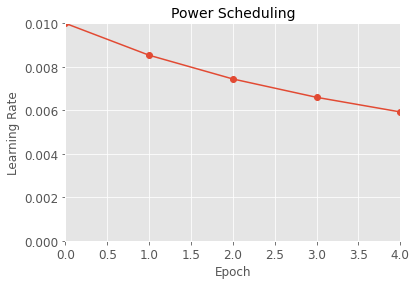

In [72]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## Exponential Scheduling

```lr = lr0 * 0.1**(epoch / s)```

In [73]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [74]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [75]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 5

In [77]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9705 - accuracy: 0.7298 - val_loss: 1.0895 - val_accuracy: 0.6166 - lr: 0.0100
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8176 - accuracy: 0.7405 - val_loss: 0.8309 - val_accuracy: 0.7722 - lr: 0.0089
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7393 - accuracy: 0.7636 - val_loss: 0.8405 - val_accuracy: 0.7402 - lr: 0.0079
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6455 - accuracy: 0.7835 - val_loss: 0.8865 - val_accuracy: 0.7820 - lr: 0.0071
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6260 - accuracy: 0.7975 - val_loss: 0.7980 - val_accuracy: 0.8032 - lr: 0.0063


In [78]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 930us/step - loss: 0.8311 - accuracy: 0.8007


[0.831062376499176, 0.8007000088691711]

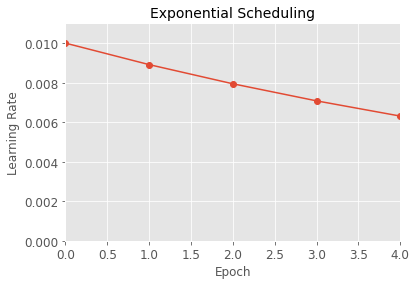

In [79]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

The schedule function can take the current learning rate as a second argument:

In [80]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

If you want to update the learning rate at each iteration rather than at each epoch, you must write your own callback class:

In [81]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 5

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8279 - accuracy: 0.7588 - val_loss: 0.7552 - val_accuracy: 0.7766 - lr: 0.0089
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6438 - accuracy: 0.8019 - val_loss: 0.6256 - val_accuracy: 0.8196 - lr: 0.0079
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5663 - accuracy: 0.8222 - val_loss: 0.4834 - val_accuracy: 0.8502 - lr: 0.0071
Epoch 4/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5042 - accuracy: 0.8393 - val_loss: 0.4731 - val_accuracy: 0.8446 - lr: 0.0063
Epoch 5/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4662 - accuracy: 0.8510 - val_loss: 0.5242 - val_accuracy: 0.8500 - lr: 0.0056


In [82]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 905us/step - loss: 0.5524 - accuracy: 0.8393


[0.5524389743804932, 0.8392999768257141]

In [83]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

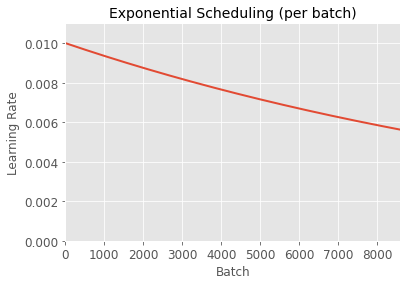

In [84]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

## Piecewise Constant Scheduling

In [85]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [86]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [87]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 5
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8545 - accuracy: 0.7532 - val_loss: 0.6414 - val_accuracy: 0.8196 - lr: 0.0100
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0753 - accuracy: 0.6666 - val_loss: 1.3604 - val_accuracy: 0.5162 - lr: 0.0100
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 1.1045 - accuracy: 0.6082 - val_loss: 1.0826 - val_accuracy: 0.6084 - lr: 0.0100
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 1.1004 - accuracy: 0.5992 - val_loss: 1.4378 - val_accuracy: 0.4890 - lr: 0.0100
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 1.8103 - accuracy: 0.4321 - val_loss: 1.5252 - val_accuracy: 0.4680 - lr: 0.0100


In [88]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 935us/step - loss: 1.5384 - accuracy: 0.4732


[1.5384329557418823, 0.4731999933719635]

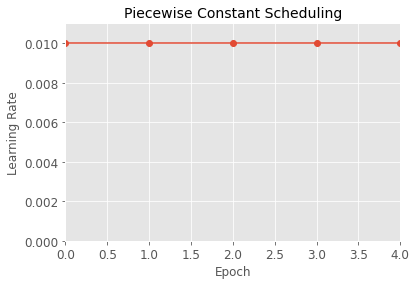

In [89]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## Performance Scheduling

In [90]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 5
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5834 - accuracy: 0.8086 - val_loss: 0.5499 - val_accuracy: 0.8338 - lr: 0.0200
Epoch 2/5
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5156 - accuracy: 0.8353 - val_loss: 0.4701 - val_accuracy: 0.8516 - lr: 0.0200
Epoch 3/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5098 - accuracy: 0.8435 - val_loss: 0.5828 - val_accuracy: 0.8386 - lr: 0.0200
Epoch 4/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5138 - accuracy: 0.8477 - val_loss: 0.7165 - val_accuracy: 0.8338 - lr: 0.0200
Epoch 5/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5237 - accuracy: 0.8483 - val_loss: 0.7548 - val_accuracy: 0.8440 - lr: 0.0200


In [91]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 875us/step - loss: 0.8176 - accuracy: 0.8351


[0.8175531029701233, 0.835099995136261]

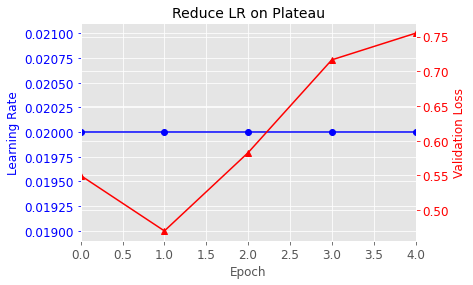

In [92]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

## tf.keras Schedulers

In [93]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 5
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4854 - accuracy: 0.8290 - val_loss: 0.3995 - val_accuracy: 0.8618
Epoch 2/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3814 - accuracy: 0.8647 - val_loss: 0.3879 - val_accuracy: 0.8628
Epoch 3/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3483 - accuracy: 0.8749 - val_loss: 0.3644 - val_accuracy: 0.8716
Epoch 4/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3263 - accuracy: 0.8826 - val_loss: 0.3466 - val_accuracy: 0.8794
Epoch 5/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3095 - accuracy: 0.8885 - val_loss: 0.3433 - val_accuracy: 0.8808


In [94]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 916us/step - loss: 0.3706 - accuracy: 0.8666


[0.37064164876937866, 0.866599977016449]

For piecewise constant scheduling, try this:

In [95]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

# Avoiding Overfitting Through Regularization

## $\ell_1$ and $\ell_2$ regularization

In [101]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [104]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 5s 3ms/step - loss: 1.6235 - accuracy: 0.8116 - val_loss: 0.7258 - val_accuracy: 0.8220
Epoch 2/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7173 - accuracy: 0.8270 - val_loss: 0.6822 - val_accuracy: 0.8374


In [105]:
RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 5s 3ms/step - loss: 1.6841 - accuracy: 0.8143 - val_loss: 0.7378 - val_accuracy: 0.8282
Epoch 2/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7200 - accuracy: 0.8269 - val_loss: 0.6807 - val_accuracy: 0.8456


In [106]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.7183 - accuracy: 0.8257


[0.7182977795600891, 0.8256999850273132]

## Dropout

In [107]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5722 - accuracy: 0.8031 - val_loss: 0.3701 - val_accuracy: 0.8686
Epoch 2/2
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4213 - accuracy: 0.8466 - val_loss: 0.3628 - val_accuracy: 0.8670


In [108]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8515


[0.41196757555007935, 0.8514999747276306]

## Alpha Dropout

In [109]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6635 - accuracy: 0.7568 - val_loss: 0.6044 - val_accuracy: 0.8374
Epoch 2/2
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5594 - accuracy: 0.7954 - val_loss: 0.5531 - val_accuracy: 0.8454


In [110]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 818us/step - loss: 0.6063 - accuracy: 0.8324


[0.6062736511230469, 0.8324000239372253]

## MC Dropout

In [111]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [112]:
y_pred = np.argmax(y_proba, axis=1)

In [113]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8357

In [114]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [115]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [116]:
mc_model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_275 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_276 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_277 (Dense)            (None, 10)              

In [117]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [118]:
mc_model.set_weights(model.get_weights())

Now we can use the model with MC Dropout:

In [119]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.01, 0.26, 0.01, 0.53]],
      dtype=float32)

## Max Norm

In [120]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [121]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid), verbose=0)

In [122]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 907us/step - loss: 0.4047 - accuracy: 0.8557


[0.4046913981437683, 0.8557000160217285]